# Explorando normalidad en un conjunto de datos 

En este notebook haremos un analisis estadistico para verificar normalidad en un conjunto de datos. 

## Outline

1. **Datos:** Trabajaremos con datos simulados de una distribucion `skew normal` de parametro de $\alpha$.

2. Construiremos las graficas PP y QQ suponiendo el modelo normal. Analizaremos el efecto de la `skewnewss` en estas graficas. 

3. Agregaremos `confidence intervals` a estas grafcias PP y QQ. 

4. Finalmente, exploraremos el desempeño de algunas pruebas de normalidad vistas en clase. 


---
## Datos y Paqueteria

In [ ]:
# Instalar 
install.packages('sn')
install.packages('ggplot2')
install.packages('tidyverse')
install.packages('nortest')
install.packages('gridExtra')
options(warn=-1)

Ahora simularemos los datos de una `skew normal` de parametro $\alpha$.

In [ ]:
# Simular skew normal 
library(sn)# Azzalini skewnormal package
SIZE=100
data<-rsn(SIZE,0,1,alpha=0.5)

## Gráficas PP y QQ
En la siguiente celda construiremos dichas graficas

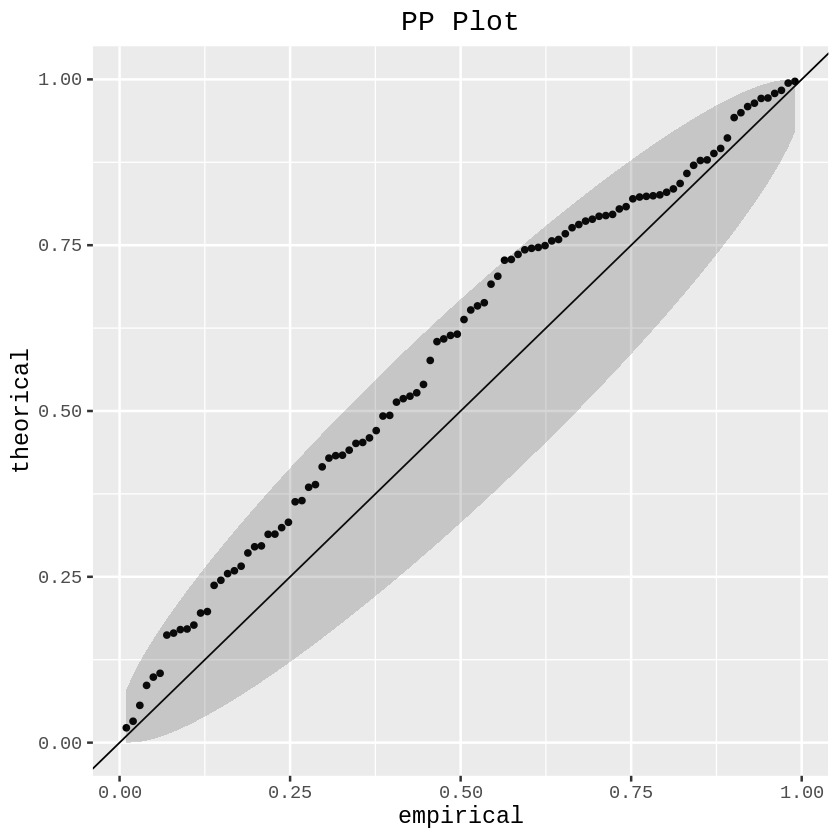

In [ ]:
#################
# PP y QQ Plots #
#################
library(ggplot2) 

theme_set(theme_gray(base_line_size=0.7,base_family = "Comic Sans MS",base_size = 14))
theme_update(plot.title = element_text(hjust = 0.5))
empirical <- seq(1,SIZE)/(SIZE+1)

# Nivel segun Bonferroni
nivelOld <- 0.05
bonfCorrec <- 1-(nivelOld/SIZE)
nivelNew <- 1-bonfCorrec

#Bandas de Confianza
BandSup<-function(k){
  q<-qbeta(nivelNew/2,k,SIZE+1-k)
  return(q)
}
BandInf<-function(k){
  q<-qbeta(1-nivelNew/2,k,SIZE+1-k)
  return(q)
}

# Data frame para graficar
probData<-pnorm(data,0,1)
theorical<-sort(probData,decreasing = FALSE)
Index<-c(1:SIZE); supBand=BandSup(Index); infBand=BandInf(Index)
df_plot_PP <- data.frame(supBand,infBand,theorical,empirical)

PP_Plot<-ggplot(df_plot_PP,aes(x=empirical,y=theorical))+
geom_point()+geom_abline(slope = 1,intercept = 0)+
geom_ribbon(aes(ymin = infBand, ymax = supBand), alpha = 0.2)+
ggtitle('PP Plot')

df_plot_QQ=data.frame(lapply(df_plot_PP,function(a) qnorm(a,0,1)))

QQ_Plot <-ggplot(df_plot_QQ,aes(x=empirical,y=theorical))+
geom_point()+geom_abline(slope = 1,intercept = 0)+
geom_ribbon(aes(ymin = infBand, ymax = supBand), alpha = 0.2)+
ggtitle('QQ Plot')

PP_Plot

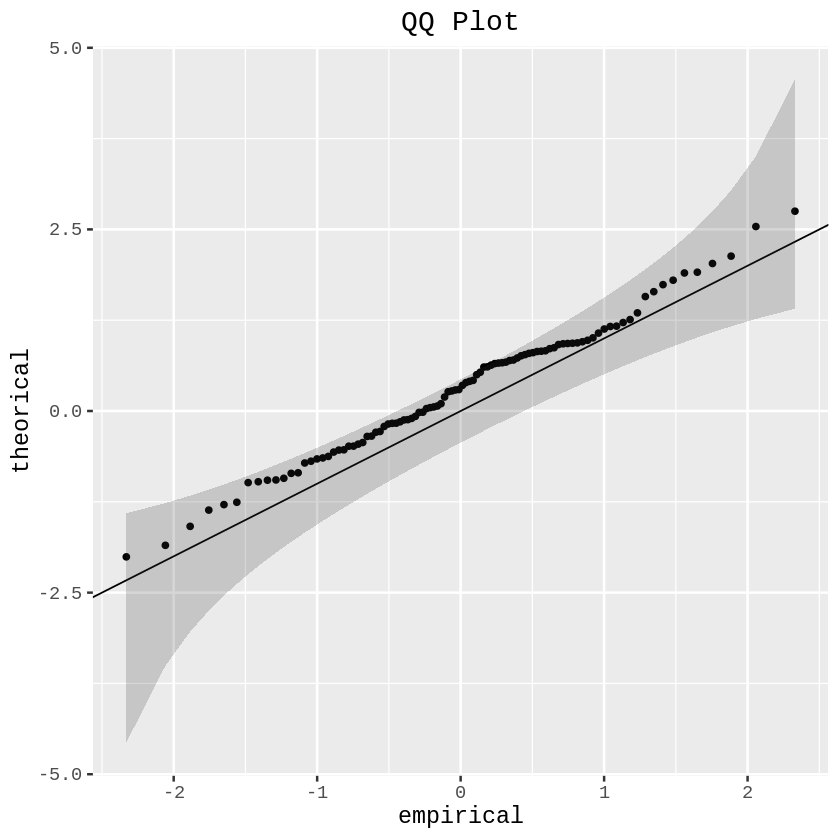

In [ ]:
QQ_Plot

## Pruebas de Hipotesis

Se han visto dos en la clase:

- Shapiro-Wilk
- Anderson-Darling

Se calculara el poder de la prueba via simulaciones 

In [ ]:
shapiro.test(data)


	Shapiro-Wilk normality test

data:  data
W = 0.99207, p-value = 0.826


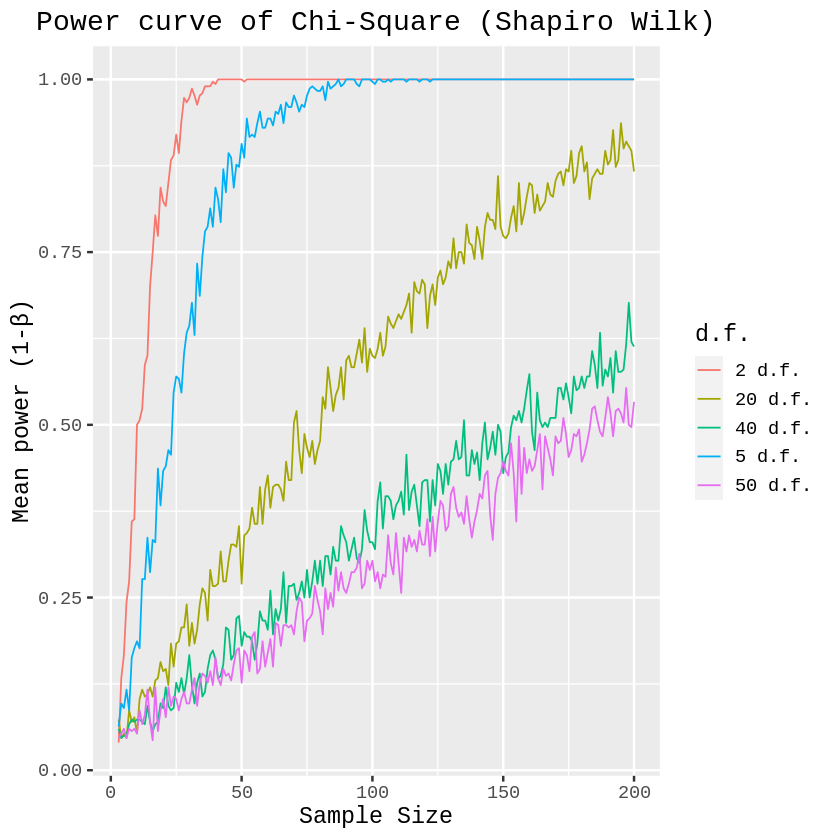

In [ ]:
library(tidyr)
# Poder prueba de Shapiro Wilk
power_func <- function(reps, alpha, dfs, samples) {
  power <- c()
  for (i in 3:samples){
  test <- mean(replicate(reps,(shapiro.test(rchisq(i, dfs))$p.value<alpha)))
  power <- c(power, test)
  }
  return(power)
}
reps = 300
alpha = 0.05
dfs <- c(2, 5, 20, 40, 50)
samples <- 200
df<- data.frame(n = c(3:samples))
for (i in 2:(length(dfs)+1)){
  df[,i] <- power_func(reps, alpha, dfs[i-1], samples)
}
colnames(df) <- c("n", "2 d.f.", "5 d.f.", "20 d.f.", "40 d.f.", "50 d.f.")
long_df <- pivot_longer(df, -n)
colnames(long_df)[2] <- "d.f."
ggplot(long_df, aes (x = n, y = value, color = d.f.))+geom_line()+
  ggtitle("Power curve of Chi-Square (Shapiro Wilk)")+
  xlab("Sample Size")+
  ylab("Mean power (1-β)")+
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
library(nortest)
ad.test(data)


	Anderson-Darling normality test

data:  data
A = 0.33326, p-value = 0.5062


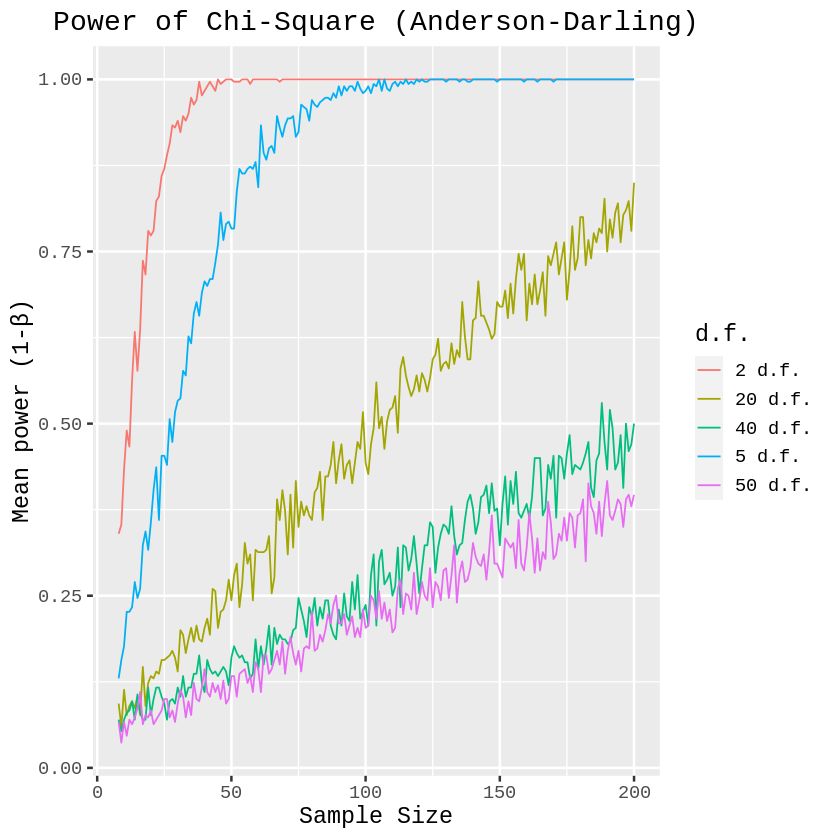

In [ ]:
# Poder prueba de Anderson Darling
power_func <- function(reps, alpha, dfs, samples) {
  power <- c()
  for (i in 8:samples){
  test <- mean(replicate(reps,(ad.test(rchisq(i, dfs))$p.value<alpha)))
  power <- c(power, test)
  }
  return(power)
}
reps = 300
alpha = 0.05
dfs <- c(2, 5, 20, 40, 50)
samples <- 200
df<- data.frame(n = c(8:samples))
for (i in 2:(length(dfs)+1)){
  df[,i] <- power_func(reps, alpha, dfs[i-1], samples)
}
colnames(df) <- c("n", "2 d.f.", "5 d.f.", "20 d.f.", "40 d.f.", "50 d.f.")
long_df <- pivot_longer(df, -n)
colnames(long_df)[2] <- "d.f."
ggplot(long_df, aes (x = n, y = value, color = d.f.))+geom_line()+
  ggtitle("Power of Chi-Square (Anderson-Darling)")+
  xlab("Sample Size")+
  ylab("Mean power (1-β)")+
  theme(plot.title = element_text(hjust = 0.5))